std of filter data:
0.02303400963792453


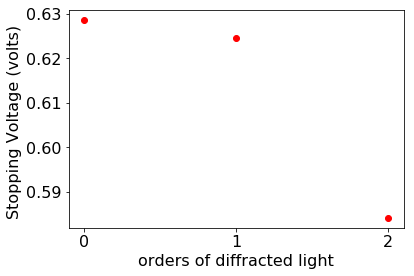

In [2]:

#Sodium Light Source Data


#Libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab

fig = plt.figure()

#filter data of the sodium lamp
fltdata = np.array([.6286,.6247,.5841,.6303,.5782])

#standard deviation function
stdflt = np.std(fltdata)
print('std of filter data:')
print(stdflt)

plt.plot([0,1,2], [.6286, .6247, .5841], 'ro')

#Modifying how the graph looks
plt.yticks(np.arange(0.59,0.63,.01),fontsize=16)
plt.xticks(np.arange(0,3,1),fontsize=16)
plt.ylabel('Stopping Voltage (volts) ',fontsize=16)
plt.xlabel('orders of diffracted light', fontsize=16)
plt.show()
labels = [0,1,2]

plt.savefig('myfig.jpg')

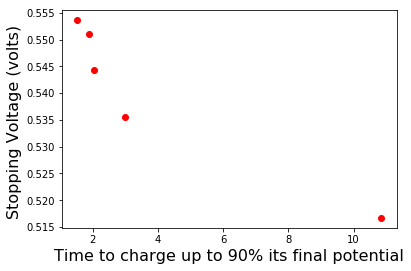

In [2]:

# Charging Time graph for the Sodium light source

#Libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab


fig = plt.figure()
plt.plot([1.52,1.88,2.03,2.98,10.85], [.5536,.5511,.5444,.5356,.5167], 'ro')

#Modifying how the graph looks
#plt.yticks(np.arange(0.59,0.63,.01),fontsize=16)
#plt.xticks(np.arange(0,3,1),fontsize=16)
plt.ylabel('Stopping Voltage (volts) ',fontsize=16)
plt.xlabel('Time to charge up to 90% its final potential', fontsize=16)
plt.show()
labels = [0,1,2]

plt.savefig('myfig.jpg')

(array([ 4.28057860e-15, -1.54746276e+00]), array([[ 7.29904159e-33, -4.65955139e-18],
       [-4.65955139e-18,  3.07841084e-03]]))
   
h/e value 4.280578599017509e-15
W0/e value -1.5474627576737732
error:
0.1155527345846908


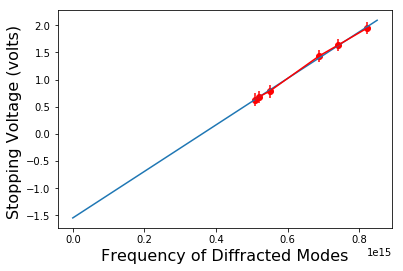

In [23]:

# Mercury Light Source 

#Libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
from scipy.optimize import curve_fit
import math 

#save figure
fig = plt.figure()

lmbda = np.array([365.0158,404.6565,435.8335,546.075,576.961,588.995])*10**-9
f =( 3*10**8)/lmbda
vs = np.array([1.9455,1.6356,1.4351,.7830,.6815,.6303])

#Modifying how the graph looks
plt.ylabel('Stopping Voltage (volts) ',fontsize=16)
plt.xlabel('Frequency of Diffracted Modes', fontsize=16)
plt.plot(f,vs,'ro')

def fit(x,m,b):
    return m*x + b

print(curve_fit(fit,f,vs))

newfitlmbda = np.linspace(0,8.5*10**14,100)

#first bracket means the first array
#second bracket means the element in that array
m = curve_fit(fit,f,vs)[0][0]
b = curve_fit(fit,f,vs)[0][1]

print('   ')
print('h/e value', m)
print('W0/e value',b)

#finding the error

#making arrays of the different trials
#blue1 = np.array([1.9435,1.9455,1.9476])
#blue2 = np.array([1.6188,1.6356,1.6313])
#blue3 = np.array([1.4351,1.4368,1.4310])
#green = np.array([.7830,.7808,.7844])
#yellow = np.array([.6841,.6803,.6815])
#soddata = np.array([.6286,.6247,.5841,.6303,.5782]) #sodium data

blue1 = [1.9435,1.9455,1.9476]
blue2 = [1.6188,1.6356,1.6313]
blue3 = [1.4351,1.4368,1.4310]
green = [.7830,.7808,.7844]
yellow = [.6841,.6803,.6815]
soddata = [.6286,.6247,.5841,.6303,.5782] #sodium data
N = 20

combdata = blue1 + blue2 + blue3 + green + yellow + soddata

datastd = np.std(combdata)
error = datastd/(math.sqrt(N))
#finding the std
#blue1std = np.std(blue1)
#blue2std = np.std(blue2)
#blue3std = np.std(blue3)
#greenstd = np.std(green)
#yllwstd  = np.std(yellow)
#stdflt = np.std(soddata) 

#calculating the total error in a simple sum of error
#error = math.sqrt(blue1std**2 + blue2std**2 + blue3std**2 + greenstd**2 + yllwstd**2 + stdflt**2)


print('error:')
print(error)

plt.plot(newfitlmbda, fit(newfitlmbda,m,b))
plt.errorbar(f,vs,xerr = 0,yerr = error, fmt = 'r')

plt.savefig('myfig.jpg')